In [80]:
import requests
import os

In [7]:
response = requests.get('https://www.gismeteo.ru/', headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.2.773 Yowser/2.5 Safari/537.36'})

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(response.content)

In [12]:
soup

<!DOCTYPE html>
<html class="html-index" lang="ru" prefix="og: http://ogp.me/ns#" xml:lang="ru" xmlns="http://www.w3.org/1999/xhtml"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="#FFF" name="theme-color"/><meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover" name="viewport"/><link crossorigin="" href="https://static.gismeteo.st/" rel="preconnect"/><link href="https://static.gismeteo.st/" rel="dns-prefetch"/><link crossorigin="" href="https://rss-images.gismeteo.st/" rel="preconnect"/><link href="https://rss-images.gismeteo.st/" rel="dns-prefetch"/><link href="https://static.gismeteo.st/assets/meta/favicon.png" rel="shortcut icon" type="image/png"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="black" name="apple-mobile-web-app-status-bar-style"/><meta content="Gismeteo" name="apple-mobile-web-app

In [18]:
soup.find_all('div', attrs={'class': 'weather-info-header'})[0]

<div class="weather-info-header"><div class="weather-temperature"><div class="temperature" style="background-color: rgba(200, 239, 167, 0.3); border-bottom: 1px solid rgba(200, 239, 167, 1)"><span class="unit unit_temperature_c"><span class="sign">+</span>0<span class="lower">,5</span></span> <span class="unit unit_temperature_f"><span class="sign"></span>33</span></div></div><div class="weather-icon"><svg><use xlink:href="#c4"></use></svg></div><div class="weather-description">Пасмурно</div></div>

In [17]:
soup.find_all('div', attrs={'class': 'weather-info-header'})[0].find('span', attrs={'class': 'sign'}).text

'+'

In [19]:
soup.find_all('div', attrs={'class': 'weather-info-header'})[0].find('span', attrs={'class': 'unit_temperature_c'}).text

'+0,5'

In [24]:
def get_temperature():
    response = requests.get('https://www.gismeteo.ru/', headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.85 YaBrowser/21.11.2.773 Yowser/2.5 Safari/537.36'})
    soup = BeautifulSoup(response.content)
    return float(soup.find_all('div', attrs={'class': 'weather-info-header'})[0].find('span', attrs={'class': 'unit_temperature_c'}).text.replace(',', '.'))

In [25]:
get_temperature()

0.5

## Banki ru

In [27]:
url = 'https://www.banki.ru/banks/ratings/export.php?SEARCH_NAME=&SEARCH_REGN=&search[type]=name&sort_param=rating&sort_order=ASC&PROPERTY_ID=10&REGION_ID=0&date1=2020-08-01&date2=2020-07-01&IS_SHOW_GROUP=0&IS_SHOW_LIABILITIES=0'

In [31]:
with open('data.csv', 'wb') as f:
    data = requests.get(url).content
    f.write(data)

In [32]:
import pandas as pd

In [39]:
table = pd.read_csv('data.csv', encoding='windows-1251', skiprows=2, sep=';')

In [40]:
table

,Позиция в рейтинге,Изменение позиции в рейтинге,Название банка,Номер лицензии,Регион регистрации,"Август, 2020, тыс. рублей","Июль, 2020, тыс. рублей","Изменение, тыс. рублей","Изменение, %"
0,1,0,СберБанк,1481,Москва и обл.,"32 038 692 505,00","31 415 098 095,00","623 594 410,00","1,99"
1,2,0,ВТБ,1000,Санкт-Петербург и обл.,"15 812 570 376,00","15 269 639 853,00","542 930 523,00","3,56"
2,3,0,Газпромбанк,354,Москва и обл.,"7 464 298 277,00","7 031 457 276,00","432 841 001,00","6,16"
3,4,0,Национальный Клиринговый Центр,3466,Москва и обл.,"4 758 431 795,00","4 487 642 224,00","270 789 571,00","6,03"
4,5,0,Альфа-Банк,1326,Москва и обл.,"4 045 250 732,00","3 937 290 975,00","107 959 757,00","2,74"
...,...,...,...,...,...,...,...,...,...
409,410,7,Премиум,3514,Москва и обл.,"144 655,00","144 655,00","0,00",0
410,411,7,Дальний Восток,3318,Приморский край,"128 294,00","131 072,00","-2 778,00","-2,12"
411,412,7,Перспектива,3532,Омская обл.,"119 571,00","119 571,00","0,00",0
412,413,7,Петербургский Расчетный Центр,3306,Санкт-Петербург и обл.,"114 941,00","113 850,00","1 091,00","0,96"


In [58]:
dates = []
for year in range(2010, 2021):
    for month in range(1, 13):
        dates.append(datetime.datetime.strftime(datetime.date(year, month, 1), "%Y-%m-%d"))

In [60]:
for i in range(len(dates)-1):
    date2 = dates[i]
    date1 = dates[i+1]
    url = f'https://www.banki.ru/banks/ratings/export.php?SEARCH_NAME=&SEARCH_REGN=&search[type]=name&sort_param=rating&sort_order=ASC&PROPERTY_ID=10&REGION_ID=0&date1={date1}&date2={date2}&IS_SHOW_GROUP=0&IS_SHOW_LIABILITIES=0'
    with open(f'banks_data/{date1}.csv', 'wb') as f:
        data = requests.get(url).content
        f.write(data)

### spb texnic

In [70]:
import json

In [71]:
import websocket

header = {
    'user-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:82.0) Gecko/20100101 Firefox/82.0'
}
def on_message(ws, message):
    try:
        message = json.loads(message)
        print(message["header"]["id"], message["latitude"], message["longitude"])
    except Exception as e:
        print('error occured - ignorring', e)

def on_error(ws, error):
    print("received error as {}".format(error))

def on_close(ws):
    print("Connection closed")

def on_open(ws):
    
    print("Open connection")
    ws.send('{"event":"load_stock","args":[{"type":"function","id":"qbotk"}]}')

def start():
    websocket.enableTrace(True)
    ws = websocket.WebSocketApp('wss://ut.kb.gov.spb.ru/wstele1/',
                              on_message = on_message,
                              on_error = on_error,
                              on_close = on_close,
                              header=header)
    ws.on_open = on_open
    ws.run_forever()

start()

--- request header ---
GET /wstele1/ HTTP/1.1
Upgrade: websocket
Connection: Upgrade
Host: ut.kb.gov.spb.ru
Origin: http://ut.kb.gov.spb.ru
Sec-WebSocket-Key: PJ5oiMLeBwEUbt4maiRlyg==
Sec-WebSocket-Version: 13
user-agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:82.0) Gecko/20100101 Firefox/82.0


-----------------------
--- response header ---
HTTP/1.1 101 Switching Protocols
Server: nginx/1.20.1
Date: Fri, 17 Dec 2021 17:26:10 GMT
Connection: upgrade
Upgrade: websocket
Sec-WebSocket-Accept: bsgWTjEPtMLLwuCfPRawvphTNyU=
-----------------------
send: b'\x81\xc0;\x0f\xa2\x80@-\xc7\xf6^a\xd6\xa2\x01-\xce\xefZk\xfd\xf3O`\xc1\xeb\x19#\x80\xe1Ih\xd1\xa2\x01T\xd9\xa2Ov\xd2\xe5\x195\x80\xe6Na\xc1\xf4R`\xcc\xa2\x17-\xcb\xe4\x195\x80\xf1Y`\xd6\xeb\x19r\xff\xfd'


Open connection
error occured - ignorring 'header'
163 59.859291666666664 30.023156666666665
84 59.700493333333334 30.382305
133 59.986745 30.251021666666666
231 60.07358 30.375955
27 59.82434166666667 30.192233333333334
100 59.927018333333336 30.38177
error occured - ignorring 'latitude'
200 59.87480333333333 30.269615
1 60.063581666666664 30.327158333333333
126 59.899773333333336 30.371926666666667
166 60.202785 29.6937
93 59.840426666666666 30.456775
127 59.935498333333335 30.48023
error occured - ignorring 'latitude'
68 59.969991666666665 30.44049
243 59.806266666666666 30.444146666666665
130 60.016821666666665 30.290281666666665
error occured - ignorring 'latitude'
error occured - ignorring list indices must be integers or slices, not str
error occured - ignorring 'latitude'
209 59.939256666666665 30.363438333333335
error occured - ignorring 'latitude'
169 59.88597333333333 30.341448333333332
30 60.06346333333333 30.325486666666666
75 59.89957833333333 30.371595
20 60.080365 29.95

error occured - ignorring 'latitude'
77 59.760173333333334 30.111428333333333
108 59.93378666666667 30.38347
220 59.82368833333334 30.19328
error occured - ignorring 'latitude'
247 59.85602166666666 30.287863333333334
185 59.723635 30.442306666666667
13 59.925981666666665 30.37851
130 59.935491666666664 30.480245
59 59.86623 29.815383333333333
86 59.83038 30.36066
error occured - ignorring 'latitude'
error occured - ignorring 'latitude'
error occured - ignorring 'latitude'
252 59.85641 30.28736
213 59.938586666666666 30.363365
0 59.94963 30.252751666666665
145 59.86211 30.423755
6 60.06295333333333 30.325765
89 59.949918333333336 30.253351666666667
error occured - ignorring 'latitude'
168 59.85695333333334 30.423845
error occured - ignorring 'latitude'
216 59.856183333333334 30.287041666666667
error occured - ignorring 'latitude'
131 59.987185 30.25270666666667
25 59.752676666666666 30.103613333333332
8 59.94004666666667 30.250648333333334
128 0.0 0.0
error occured - ignorring 'latitud

send: b'\x88\x82IUk\xfcJ\xbd'


received error as 
Connection closed


### Selenium

In [77]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Firefox()
driver.get("http://www.google.com/")

#open tab
driver.find_element_by_tag_name('body').send_keys(Keys.COMMAND + 't') 
# You can use (Keys.CONTROL + 't') on other OSs

# Load a page 
driver.get('http://stackoverflow.com/')
# Make the tests...

# close the tab
# (Keys.CONTROL + 'w') on other OSs.
driver.find_element_by_tag_name('body').send_keys(Keys.COMMAND + 'w') 


#driver.close()

C:\Users\Brux\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  
C:\Users\Brux\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


## Pandas, numpy...

In [100]:
import numpy as np

In [78]:
table = pd.read_csv('data.csv', encoding='windows-1251', skiprows=2, sep=';')

In [83]:
tables = []
for fn in os.listdir('banks_data/'):
    table = pd.read_csv(f'banks_data/{fn}', encoding='windows-1251', skiprows=2, sep=';')
    columns = list(table.columns)
    columns[5] = 'end_period'
    columns[6] = 'start_period'
    table.columns = columns
    table['date'] = fn.split('.')[0]
    tables.append(table)

In [91]:
all_stat = pd.concat(tables)

In [95]:
all_stat['end_period'] = all_stat['end_period'].apply(lambda x: int(x.split(',')[0].replace(' ', '')))

In [101]:
def process_ammount(x):
    try:
        return int(x.split(',')[0].replace(' ', ''))
    except:
        return np.NaN

In [102]:
all_stat['start_period'] = all_stat['start_period'].apply(process_ammount)

In [103]:
all_stat

,Позиция в рейтинге,Изменение позиции в рейтинге,Название банка,Номер лицензии,Регион регистрации,end_period,start_period,"Изменение, тыс. рублей","Изменение, %",date
0,1,0.0,СберБанк,1481.0,Москва и обл.,7539400755,7.652717e+09,"-113 315 873,00","-1,48",2010-02-01
1,2,0.0,ВТБ,1000.0,Санкт-Петербург и обл.,2626753610,2.713934e+09,"-87 179 910,00","-3,21",2010-02-01
2,3,0.0,Газпромбанк,354.0,Москва и обл.,1798498423,1.746406e+09,"52 092 809,00","2,98",2010-02-01
3,4,0.0,Россельхозбанк,3349.0,Москва и обл.,975802301,9.738934e+08,"1 908 946,00","0,20",2010-02-01
4,5,0.0,БМ-Банк,2748.0,Москва и обл.,817397208,8.244592e+08,"-7 062 021,00","-0,86",2010-02-01
...,...,...,...,...,...,...,...,...,...,...
399,400,1.0,Дальний Восток,3318.0,Приморский край,134091,1.317490e+05,"2 342,00","1,78",2020-12-01
400,401,1.0,Перспектива,3532.0,Омская обл.,119571,1.195710e+05,"0,00",0,2020-12-01
401,402,2.0,Петербургский Расчетный Центр,3306.0,Санкт-Петербург и обл.,118643,1.153360e+05,"3 307,00","2,87",2020-12-01
402,403,0.0,Нарат,1902.0,Татарстан,114893,1.174600e+05,"-2 567,00","-2,19",2020-12-01


In [104]:
all_stat['end_period'] = np.log(all_stat['end_period'])

C:\Users\Brux\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [105]:
all_stat

,Позиция в рейтинге,Изменение позиции в рейтинге,Название банка,Номер лицензии,Регион регистрации,end_period,start_period,"Изменение, тыс. рублей","Изменение, %",date
0,1,0.0,СберБанк,1481.0,Москва и обл.,22.743409,7.652717e+09,"-113 315 873,00","-1,48",2010-02-01
1,2,0.0,ВТБ,1000.0,Санкт-Петербург и обл.,21.689015,2.713934e+09,"-87 179 910,00","-3,21",2010-02-01
2,3,0.0,Газпромбанк,354.0,Москва и обл.,21.310218,1.746406e+09,"52 092 809,00","2,98",2010-02-01
3,4,0.0,Россельхозбанк,3349.0,Москва и обл.,20.698771,9.738934e+08,"1 908 946,00","0,20",2010-02-01
4,5,0.0,БМ-Банк,2748.0,Москва и обл.,20.521636,8.244592e+08,"-7 062 021,00","-0,86",2010-02-01
...,...,...,...,...,...,...,...,...,...,...
399,400,1.0,Дальний Восток,3318.0,Приморский край,11.806274,1.317490e+05,"2 342,00","1,78",2020-12-01
400,401,1.0,Перспектива,3532.0,Омская обл.,11.691666,1.195710e+05,"0,00",0,2020-12-01
401,402,2.0,Петербургский Расчетный Центр,3306.0,Санкт-Петербург и обл.,11.683874,1.153360e+05,"3 307,00","2,87",2020-12-01
402,403,0.0,Нарат,1902.0,Татарстан,11.651757,1.174600e+05,"-2 567,00","-2,19",2020-12-01


In [110]:
from bisect import bisect_left

In [111]:
bisect_left(quantiles, 15)

4

In [108]:
quantiles = np.quantile(all_stat['end_period'], np.arange(0.1, 1, 0.1))

In [109]:
quantiles

array([13.04656339, 13.75634785, 14.24640297, 14.67794192, 15.10422213,
       15.60868722, 16.16227124, 16.91335255, 18.09610724])

In [112]:
def binarise(num):
    return bisect_left(quantiles, num)

In [113]:
all_stat['end_period'].apply(binarise)

0      9
1      9
2      9
3      9
4      9
      ..
399    0
400    0
401    0
402    0
403    0
Name: end_period, Length: 97229, dtype: int64

In [116]:
all_stat['year'] = all_stat['date'].apply(lambda x: x.split('-')[0])

In [117]:
all_stat.head()

,Позиция в рейтинге,Изменение позиции в рейтинге,Название банка,Номер лицензии,Регион регистрации,end_period,start_period,"Изменение, тыс. рублей","Изменение, %",date,year
0,1,0.0,СберБанк,1481.0,Москва и обл.,22.743409,7.652717e+09,"-113 315 873,00","-1,48",2010-02-01,2010
1,2,0.0,ВТБ,1000.0,Санкт-Петербург и обл.,21.689015,2.713934e+09,"-87 179 910,00","-3,21",2010-02-01,2010
2,3,0.0,Газпромбанк,354.0,Москва и обл.,21.310218,1.746406e+09,"52 092 809,00","2,98",2010-02-01,2010
3,4,0.0,Россельхозбанк,3349.0,Москва и обл.,20.698771,9.738934e+08,"1 908 946,00","0,20",2010-02-01,2010
4,5,0.0,БМ-Банк,2748.0,Москва и обл.,20.521636,8.244592e+08,"-7 062 021,00","-0,86",2010-02-01,2010


In [122]:
max_active = pd.DataFrame(all_stat.groupby(['Название банка', 'year'])['start_period'].max()).reset_index()

In [123]:
max_active.head()

,Название банка,year,start_period
0,1Банк,2010,298658.0
1,1Банк,2011,276505.0
2,1Банк,2012,364394.0
3,1Банк,2013,727699.0
4,1Банк,2014,1080127.0


In [126]:
pivot_actives = pd.pivot(max_active, index='Название банка', columns='year')

In [127]:
pivot_actives.to_excel('pivot_actives.xlsx')

In [128]:
mas = list(range(10))

In [129]:
mas

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [131]:
np.exp(mas) + mas

array([1.00000000e+00, 3.71828183e+00, 9.38905610e+00, 2.30855369e+01,
       5.85981500e+01, 1.53413159e+02, 4.09428793e+02, 1.10363316e+03,
       2.98895799e+03, 8.11208393e+03])

In [134]:
np.array(mas)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
A = np.array([[2, 3], [1, -7]])
b = np.array([5, 8])

x = np.linalg.inv(A) @ b

In [136]:
x

array([ 3.47058824, -0.64705882])

In [138]:
from matplotlib import pyplot as plt

%matplotlib inline

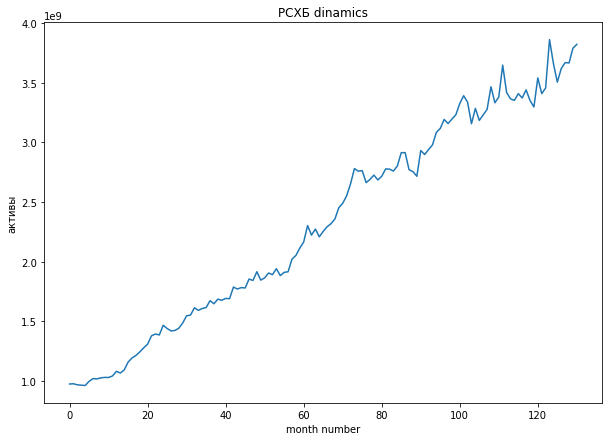

In [147]:
plt.figure(figsize=(10, 7))
plt.title('РСХБ dinamics')
plt.xlabel('month number')
plt.ylabel('активы')
plt.plot(list(all_stat[all_stat['Название банка'] == 'Россельхозбанк'].sort_values(by='date')['start_period']))

In [152]:
pivot_actives = pivot_actives.dropna()

In [153]:
preprocessed_actives = np.log(pivot_actives)

In [154]:
preprocessed_actives

start_period                                              \
year                   2010       2011       2012       2013       2014   
Название банка                                                            
Абсолют Банк      18.778382  18.610617  18.610916  18.575749  19.184084   
Авангард          17.802905  18.111782  18.396628  18.644483  18.643527   
Аверс             15.588842  16.343905  16.931134  17.346877  17.599874   
АвтоКредитБанк    12.809566  12.724664  13.030812  13.133479  13.512169   
Автоградбанк      15.233279  15.467634  15.673507  15.818295  15.679096   
...                     ...        ...        ...        ...        ...   
Юг-Инвестбанк     15.257685  15.400439  15.591909  15.730158  15.811887   
ЮниКредит Банк    20.221867  20.631727  20.611498  20.602354  20.843053   
Юнистрим          14.355738  14.595945  14.704533  14.935515  14.924294   
Яндекс Банк       14.270264  14.064684  14.057098  14.150459  14.256431   
Яринтербанк       14.420083  14.576014  14.599384  14.644141  14.724464   

                                                                       \
year                 2015       2016       2017       2018       2019   
Название банка                                                          
Абсолют Банк    19.405111  19.516045  19.448925  19.512082  19.467922   
Авангард        18.744983  18.790915  18.820816  18.767678  18.740170   
Аверс           17.937713  18.708243  18.709892  18.765550  18.800968   
АвтоКредитБанк  13.361309  13.646023  14.257776  14.543744  14.697786   
Автоградбанк    15.493447  15.712210  15.678337  15.688990  15.712692   
...                   ...        ...        ...        ...        ...   
Юг-Инвестбанк   15.938220  16.100230  16.237510  16.240689  16.296775   
ЮниКредит Банк  21.159498  21.129915  20.972566  21.035724  21.120109   
Юнистрим        15.080752  15.372359  15.409029  15.476652  15.057781   
Яндекс Банк     14.206775  13.903042  13.644556  14.115211  14.608614   
Яринтербанк     14.670429  14.647978  14.605410  14.643182  14.855091   

                           
year                 2020  
Название банка             
Абсолют Банк    19.476876  
Авангард        18.747223  
Аверс           18.617301  
АвтоКредитБанк  14.852797  
Автоградбанк    15.735017  
...                   ...  
Юг-Инвестбанк   16.379664  
ЮниКредит Банк  21.174255  
Юнистрим        14.987689  
Яндекс Банк     14.244877  
Яринтербанк     14.892144  

[402 rows x 11 columns]

In [156]:
points = np.array(preprocessed_actives)

In [157]:
from sklearn.cluster import KMeans

In [161]:
kmeans = KMeans(3)

In [164]:
labels = kmeans.fit_predict(points)

In [165]:
banks_clustered = preprocessed_actives.copy()
banks_clustered['cluster'] = labels

In [166]:
banks_clustered

start_period                                              \
year                   2010       2011       2012       2013       2014   
Название банка                                                            
Абсолют Банк      18.778382  18.610617  18.610916  18.575749  19.184084   
Авангард          17.802905  18.111782  18.396628  18.644483  18.643527   
Аверс             15.588842  16.343905  16.931134  17.346877  17.599874   
АвтоКредитБанк    12.809566  12.724664  13.030812  13.133479  13.512169   
Автоградбанк      15.233279  15.467634  15.673507  15.818295  15.679096   
...                     ...        ...        ...        ...        ...   
Юг-Инвестбанк     15.257685  15.400439  15.591909  15.730158  15.811887   
ЮниКредит Банк    20.221867  20.631727  20.611498  20.602354  20.843053   
Юнистрим          14.355738  14.595945  14.704533  14.935515  14.924294   
Яндекс Банк       14.270264  14.064684  14.057098  14.150459  14.256431   
Яринтербанк       14.420083  14.576014  14.599384  14.644141  14.724464   

                                                                       \
year                 2015       2016       2017       2018       2019   
Название банка                                                          
Абсолют Банк    19.405111  19.516045  19.448925  19.512082  19.467922   
Авангард        18.744983  18.790915  18.820816  18.767678  18.740170   
Аверс           17.937713  18.708243  18.709892  18.765550  18.800968   
АвтоКредитБанк  13.361309  13.646023  14.257776  14.543744  14.697786   
Автоградбанк    15.493447  15.712210  15.678337  15.688990  15.712692   
...                   ...        ...        ...        ...        ...   
Юг-Инвестбанк   15.938220  16.100230  16.237510  16.240689  16.296775   
ЮниКредит Банк  21.159498  21.129915  20.972566  21.035724  21.120109   
Юнистрим        15.080752  15.372359  15.409029  15.476652  15.057781   
Яндекс Банк     14.206775  13.903042  13.644556  14.115211  14.608614   
Яринтербанк     14.670429  14.647978  14.605410  14.643182  14.855091   

                          cluster  
year                 2020          
Название банка                     
Абсолют Банк    19.476876       2  
Авангард        18.747223       2  
Аверс           18.617301       1  
АвтоКредитБанк  14.852797       0  
Автоградбанк    15.735017       1  
...                   ...     ...  
Юг-Инвестбанк   16.379664       1  
ЮниКредит Банк  21.174255       2  
Юнистрим        14.987689       0  
Яндекс Банк     14.244877       0  
Яринтербанк     14.892144       0  

[402 rows x 12 columns]

In [183]:
import umap

manifold = umap.UMAP(n_neighbors=5).fit_transform(points)

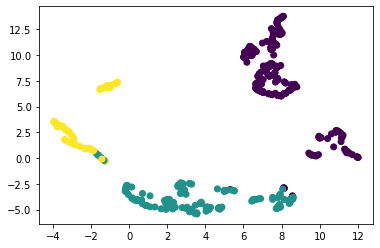

In [184]:
plt.scatter(manifold[:,0], manifold[:,1], c=banks_clustered['cluster'])

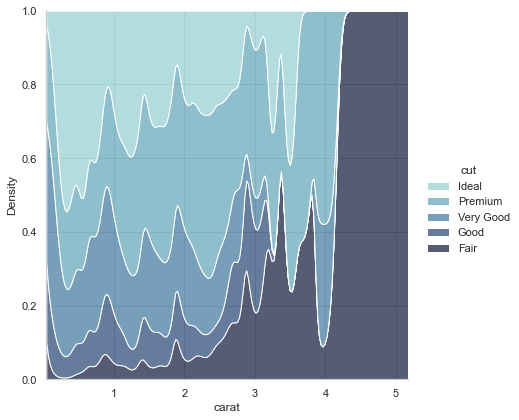

In [185]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)